### Question 1)
Read the given dataset as a dataframe and check for missing values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
jewels = pd.read_csv("jewel.csv")
jewels.isnull().values.any()

False

### Question 2)
Create line plots for 'y', 'z', 'depth', and 'table' attributes versus price separately in order to check for potential outliers.

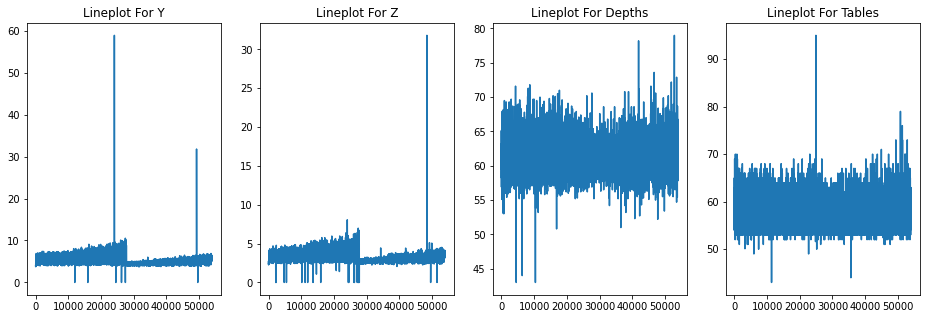

In [2]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,5))
ax1.plot(jewels["y"])
ax1.set_title("Lineplot For Y")
ax2.plot(jewels["z"])
ax2.set_title("Lineplot For Z")
ax3.plot(jewels["depth"])
ax3.set_title("Lineplot For Depths")
ax4.plot(jewels["table"])
ax4.set_title("Lineplot For Tables")
plt.show()

### Question 3)

Find and remove outliers by analyzing the above output of question 2. Explain your outlier detection process.

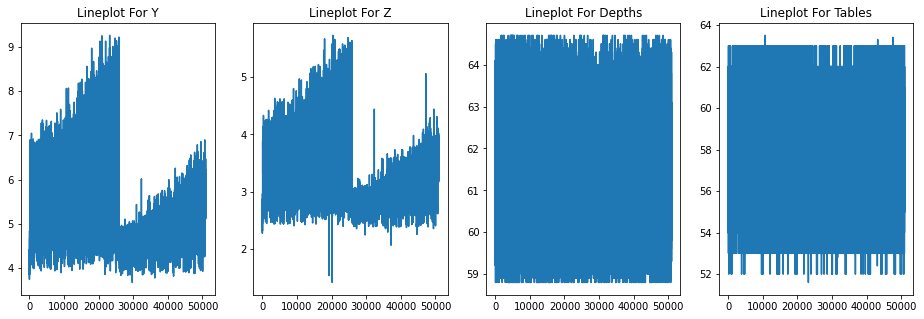

In [3]:
drop = []
def find_outliers(column):           #This function finds outliers with help of quartiles.
    q1 = jewels[column].quantile(.25)#Adds new column named try and gives -1 value for outliers.
    q3 = jewels[column].quantile(.75)#Adds all index of outliers to list named "drop".
    iqr = q3 - q1                    #And finally returns "drop" list.
    jewels["try"] = np.where(jewels[[column]]<(q1-1.5*iqr),-1,np.where(jewels[[column]]>(q3+1.5*iqr),-1,1))
    for i in jewels[jewels["try"] == -1].index:
        drop.append(i)
    jewels.drop(columns=["try"],inplace=True)
    return drop
find_outliers("y")
find_outliers("z")
find_outliers("depth")
find_outliers("table")
jewels.drop(jewels.index[drop],inplace=True)
jewels = jewels.reset_index(drop=True)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,5))
ax1.plot(jewels["y"])
ax1.set_title("Lineplot For Y")
ax2.plot(jewels["z"])
ax2.set_title("Lineplot For Z")
ax3.plot(jewels["depth"])
ax3.set_title("Lineplot For Depths")
ax4.plot(jewels["table"])
ax4.set_title("Lineplot For Tables")
plt.show()

### Question 4)
Replace ordinal values (cut, color, clarity) according to rules below:
- For "cut": 'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5
- For "color": 'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7
- For "clarity": 'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8

In [4]:
jewels.loc[jewels["cut"]=="Good","cut"]=1 
jewels.loc[jewels["cut"]=="Very Good","cut"]=2
jewels.loc[jewels["cut"]=="Fair","cut"]=3 
jewels.loc[jewels["cut"]=="Ideal","cut"]=4 
jewels.loc[jewels["cut"]=="Premium","cut"]=5 
jewels.loc[jewels["color"]=="J","color"] = 1
jewels.loc[jewels["color"]=="I","color"] = 2
jewels.loc[jewels["color"]=="H","color"] = 3
jewels.loc[jewels["color"]=="G","color"] = 4
jewels.loc[jewels["color"]=="F","color"] = 5
jewels.loc[jewels["color"]=="E","color"] = 6
jewels.loc[jewels["color"]=="D","color"] = 7
jewels.loc[jewels["clarity"]=="I1","clarity"] = 1
jewels.loc[jewels["clarity"]=="SI1","clarity"] = 2
jewels.loc[jewels["clarity"]=="SI2","clarity"] = 3
jewels.loc[jewels["clarity"]=="VS1","clarity"] = 4
jewels.loc[jewels["clarity"]=="VS2","clarity"] = 5
jewels.loc[jewels["clarity"]=="VVS1","clarity"] = 6
jewels.loc[jewels["clarity"]=="VVS2","clarity"] = 7
jewels.loc[jewels["clarity"]=="IF","clarity"] = 8
jewels

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,6,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,6,2,59.8,61.0,326,3.89,3.84,2.31
2,0.29,5,2,5,62.4,58.0,334,4.20,4.23,2.63
3,0.31,1,1,3,63.3,58.0,335,4.34,4.35,2.75
4,0.24,2,1,7,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
50966,0.72,4,7,2,60.8,57.0,2757,5.75,5.76,3.50
50967,0.72,1,7,2,63.1,55.0,2757,5.69,5.75,3.61
50968,0.70,2,7,2,62.8,60.0,2757,5.66,5.68,3.56
50969,0.86,5,3,3,61.0,58.0,2757,6.15,6.12,3.74


### Question 5)
Create bar graphs for 'cut', 'color', and 'clarity' attributes with their new values to analyze the dataset visually.


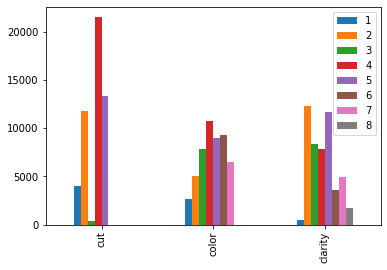

In [5]:
dfcut = jewels["cut"].value_counts()
dfcolor = jewels["color"].value_counts()
dfclarity = jewels["clarity"].value_counts()
newdf = pd.DataFrame([dfcut,dfcolor,dfclarity],index=["cut","color","clarity"])
newdf.plot(kind="bar")
plt.show()

### Question 6)
Shuffle the data points and split the dataset into training and testing set, with a 0.7-0.3 ratio (training set will be %70, and test set will be %30 of the dataset) (Write your own shuffling and spliting code here, do not use predefined function train_test_split).



In [6]:
x_columns = jewels.loc[:,jewels.columns != "price"].columns
jewels_train = jewels.sample(frac=.7,random_state = 2)
jewels_test = jewels.drop(jewels_train.index)
x_train = jewels_train[x_columns]
x_test = jewels_test[x_columns]
y_train = jewels_train["price"]
y_test = jewels_test["price"]

### Question 7)

Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Then, make prediction and calculate mean squared error (MSE). Calculate MSE for k value between 1-30 and print them. Finally, create elbow function to find best k value and plot the elbow curve. Explain how you find the best k-value.

[[1, 1091454.079654699], [2, 903192.808760055], [3, 851706.8060442235], [4, 816873.5647480544], [5, 808806.1782329474], [6, 789575.96019445], [7, 784277.435065845], [8, 789907.8540767445], [9, 792428.7602575871], [10, 796648.8253063894], [11, 797201.19988477], [12, 805223.8087055566], [13, 807869.0559856729], [14, 815468.4380251021], [15, 824624.6362667945], [16, 830585.2825533607], [17, 833821.7485190985], [18, 839396.4340542448], [19, 844133.17798187], [20, 855252.9343523969], [21, 863487.4722255218], [22, 872066.1449579265], [23, 880883.9354963612], [24, 888814.7981875004], [25, 898509.5932706038], [26, 904622.6579956342], [27, 912535.2900572066], [28, 919671.4197984276], [29, 925298.8310477878], [30, 934141.5910233327]]


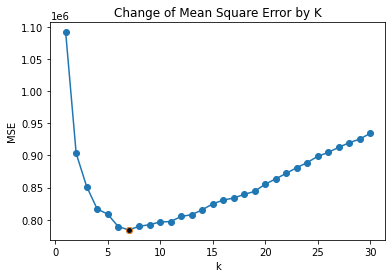

Best k value is  7


In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
kValues = []
mse_knn = []
k = 31 
for i in range(1,k):
    reg_knn = KNeighborsRegressor(n_neighbors=i)
    reg_knn.fit(x_train,y_train)
    y_pred_knn = reg_knn.predict(x_test)
    kValues.append(i)
    mse_knn.append(mean_squared_error(y_test,y_pred_knn))
i = np.argmin(mse_knn)
x_min = kValues[i]#This part finds minimum mse's x value(best value for k)
y_min = mse_knn[i]
thingstoprint = []
for i in range(k-1):
    prints = []
    prints.append(kValues[i])
    prints.append(mse_knn[i])
    thingstoprint.append(prints)
print(thingstoprint)
plt.ylabel("MSE")
plt.xlabel("k")
plt.title("Change of Mean Square Error by K")
plt.plot(kValues,mse_knn,marker="o")
plt.plot(x_min,y_min,marker="o",markerfacecolor="#000C1F") #This part marks minimum values of mse.It's x values is the best k value for use.
plt.show()
print("Best k value is " , x_min)                                  

### Question 8)

Run 10-Fold Cross validation (CV) and print accuracy values for each run of CV. Also print the final average accuracy of the model.

In [8]:
reg_knn = KNeighborsRegressor(n_neighbors=31)
trainedModel = reg_knn.fit(x_train,y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(trainedModel,x_train,y_train,cv=10)
print("Scores: ",scores)
print("Average Score: ",np.mean(scores))

Scores:  [0.94244928 0.94261729 0.94133279 0.9440993  0.94149194 0.94272821
 0.9389818  0.93566141 0.94724098 0.94045796]
Average Score:  0.9417060957959471


### Question 9)

Predict the price of new jewel data with the following custom features. 

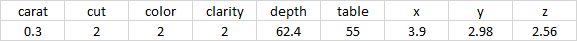

In [9]:
data = [[0.3,2,2,2,62.4,55,3.9,2.98,2.56]]
df = pd.DataFrame(data,columns=["carat","cut","color","clarity","depth","table","x","y","z"])
pred = reg_knn.predict(df)
pred[0]

477.83870967741933